# Problem Statement :
```
“Predicting the stock levels of products, based on sales data and sensor data, on an hourly basis ”
```
**
## Step 1 - Importing Necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

## Step 2 - Loading the dataset
* ### Sales data

In [5]:
sales_df=pd.read_csv("sales.csv")
sales_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
sales_df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


- **transaction_id** = this is a unique ID that is assigned to each transaction
- **timestamp** = this is the datetime at which the transaction was made
- **product_id** = this is an ID that is assigned to the product that was sold. Each product has a unique ID
- **category** = this is the category that the product is contained within
- **customer_type** = this is the type of customer that made the transaction
- **unit_price** = the price that 1 unit of this item sells for
- **quantity** = the number of units sold for this product within this transaction
- **total** = the total amount payable by the customer
- **payment_type** = the payment method used by the customer

In [6]:
sales_df.shape

(7829, 9)

In [7]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


In [8]:
sales_df.isnull().sum()

transaction_id    0
timestamp         0
product_id        0
category          0
customer_type     0
unit_price        0
quantity          0
total             0
payment_type      0
dtype: int64

In [9]:
sales_df.duplicated().sum()

0

* ### Stock data

In [10]:
stock_df = pd.read_csv("sensor_stock_levels.csv")
stock_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
stock_df.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [11]:
stock_df.shape

(15000, 4)

In [12]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   15000 non-null  object 
 1   timestamp            15000 non-null  object 
 2   product_id           15000 non-null  object 
 3   estimated_stock_pct  15000 non-null  float64
dtypes: float64(1), object(3)
memory usage: 468.9+ KB


In [13]:
stock_df.duplicated().sum()

0

In [14]:
stock_df.isnull().sum()

id                     0
timestamp              0
product_id             0
estimated_stock_pct    0
dtype: int64

* ### Temperature data

In [15]:
temp_df = pd.read_csv("sensor_storage_temperature.csv")
temp_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
temp_df.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38


In [16]:
temp_df.shape

(23890, 3)

In [17]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23890 entries, 0 to 23889
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           23890 non-null  object 
 1   timestamp    23890 non-null  object 
 2   temperature  23890 non-null  float64
dtypes: float64(1), object(2)
memory usage: 560.0+ KB


In [18]:
temp_df.duplicated().sum()

0

In [19]:
temp_df.isnull().sum()

id             0
timestamp      0
temperature    0
dtype: int64

## Step 3 - Data Cleaning
* ### Sales data

In [20]:
sales_df.timestamp = pd.to_datetime(sales_df.timestamp, format='%Y-%m-%d %H:%M:%S')

In [21]:
sales_df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [22]:
sales_df.timestamp=pd.to_datetime([i.strftime('%Y-%m-%d %H:00:00') for i in sales_df.timestamp], format='%Y-%m-%d %H:%M:%S')

In [23]:
sales_df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:00:00,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:00:00,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:00:00,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:00:00,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:00:00,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


* ### Stock data

In [24]:
stock_df.timestamp = pd.to_datetime(stock_df.timestamp, format='%Y-%m-%d %H:%M:%S')

In [25]:
stock_df.timestamp=pd.to_datetime([i.strftime('%Y-%m-%d %H:00:00') for i in stock_df.timestamp], format='%Y-%m-%d %H:%M:%S')

In [26]:
stock_df.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:00:00,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:00:00,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:00:00,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:00:00,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:00:00,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


* ### Temperature data

In [27]:
temp_df.timestamp = pd.to_datetime(temp_df.timestamp, format='%Y-%m-%d %H:%M:%S')

In [28]:
temp_df.timestamp=pd.to_datetime([i.strftime('%Y-%m-%d %H:00:00') for i in temp_df.timestamp], format='%Y-%m-%d %H:%M:%S')

In [29]:
temp_df.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:00:00,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:00:00,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:00:00,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:00:00,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:00:00,1.38


## Step 4 - EDA
* ### Sales data

In [30]:
sales_df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:00:00,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:00:00,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:00:00,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:00:00,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:00:00,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [31]:
pd.to_datetime(sales_df['timestamp']).dt.date.sort_values().unique()

array([datetime.date(2022, 3, 1), datetime.date(2022, 3, 2),
       datetime.date(2022, 3, 3), datetime.date(2022, 3, 4),
       datetime.date(2022, 3, 5), datetime.date(2022, 3, 6),
       datetime.date(2022, 3, 7)], dtype=object)

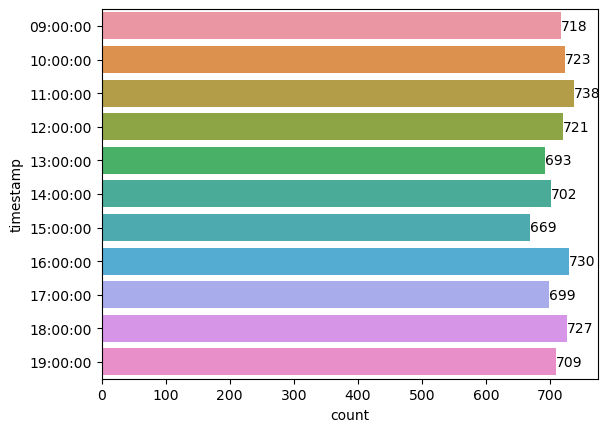

In [32]:
ax=sns.countplot(y=pd.to_datetime(sales_df['timestamp']).dt.time.sort_values())
for i in ax.containers:
  ax.bar_label(i)
plt.show()

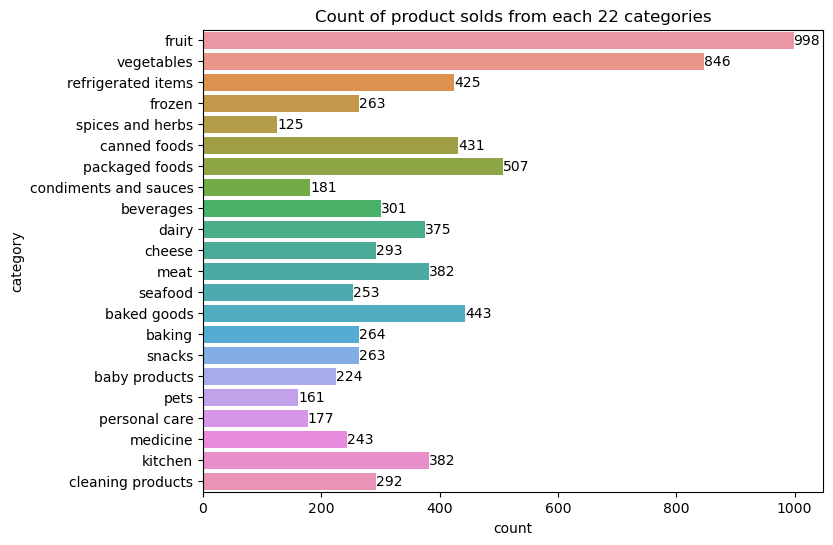

In [33]:
plt.figure(figsize=(8,6))
ax=sns.countplot(y=sales_df.category)
for i in ax.containers:
  ax.bar_label(i)
plt.title(f'Count of product solds from each {len(sales_df.category.unique())} categories')
plt.show()

In [34]:
sales_df[['unit_price','quantity','total']].describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


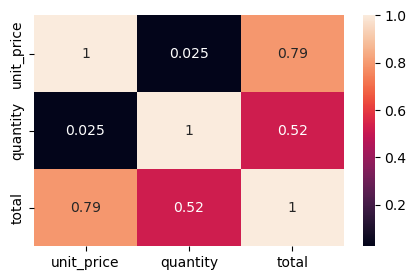

In [35]:
corr = sales_df[['unit_price','quantity','total']].corr()
plt.figure(figsize=(5,3))
sns.heatmap(corr,annot=True)
plt.show()

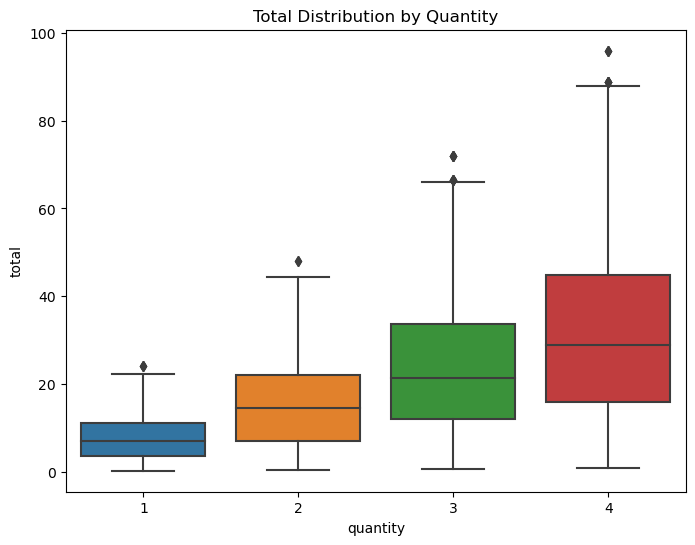

In [36]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='quantity', y='total', data=sales_df)
plt.title("Total Distribution by Quantity")
plt.show()

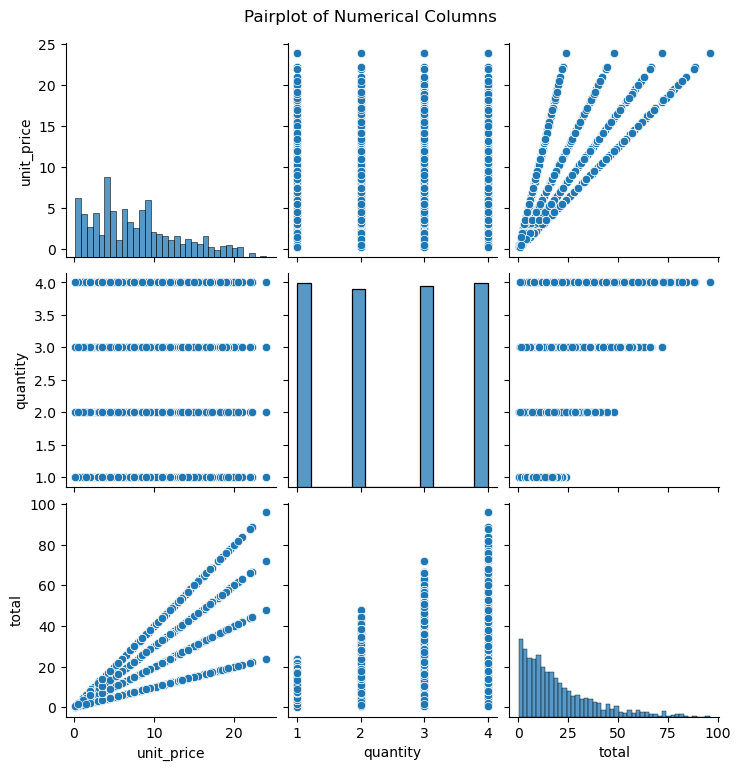

In [37]:
sns.pairplot(sales_df)
plt.suptitle("Pairplot of Numerical Columns", y=1.02)
plt.show()

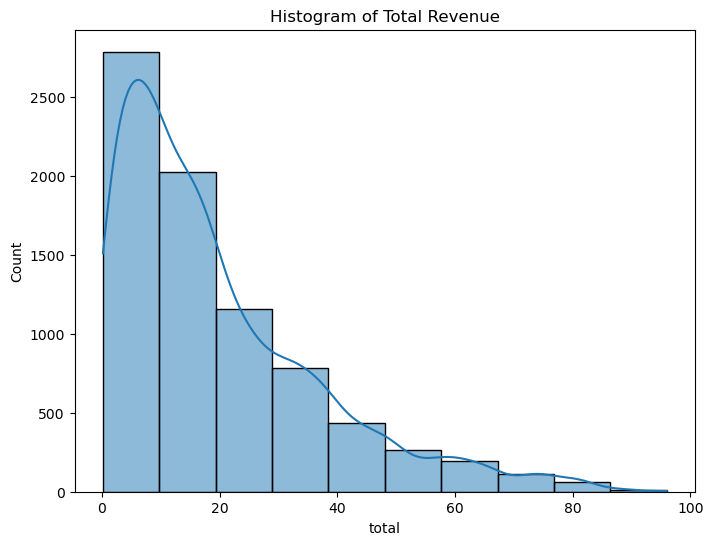

In [38]:
plt.figure(figsize=(8, 6))
sns.histplot(sales_df['total'], bins=10, kde=True)
plt.title("Histogram of Total Revenue")
plt.show()

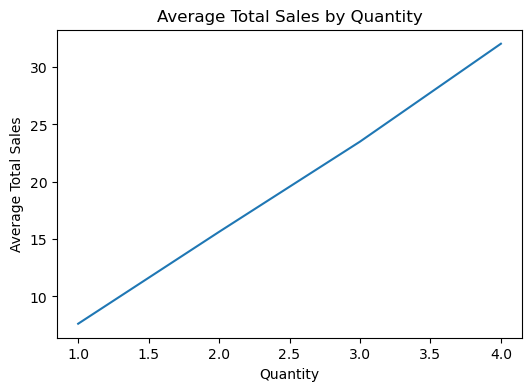

In [39]:
average_sales_by_quantity = sales_df.groupby('quantity')['total'].mean().reset_index()
plt.figure(figsize=(6, 4))
sns.lineplot(x='quantity', y='total', data=average_sales_by_quantity)
plt.title("Average Total Sales by Quantity")
plt.xlabel("Quantity")
plt.ylabel("Average Total Sales")
plt.show()

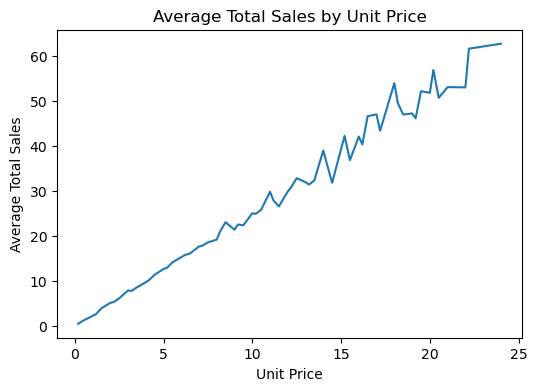

In [40]:
average_sales_by_price = sales_df.groupby('unit_price')['total'].mean().reset_index()
plt.figure(figsize=(6, 4))
sns.lineplot(x='unit_price', y='total', data=average_sales_by_price)
plt.title("Average Total Sales by Unit Price")
plt.xlabel("Unit Price")
plt.ylabel("Average Total Sales")
plt.show()

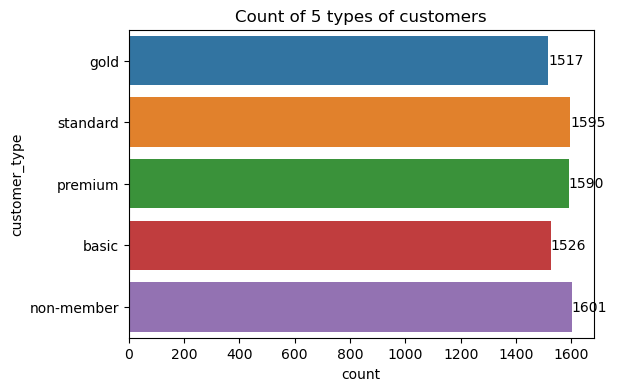

In [41]:
plt.figure(figsize=(6,4))
ax=sns.countplot(y=sales_df.customer_type)
for i in ax.containers:
  ax.bar_label(i)
plt.title(f'Count of {len(sales_df.customer_type.unique())} types of customers')
plt.show()

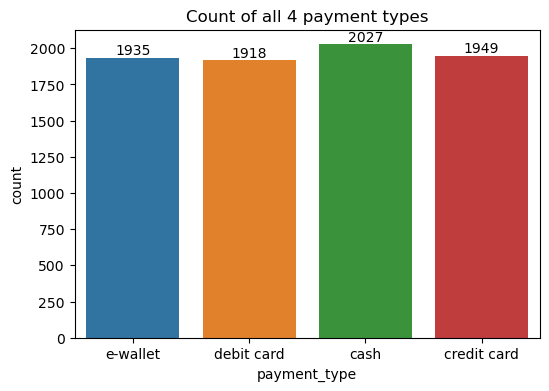

In [42]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x=sales_df.payment_type)
for i in ax.containers:
  ax.bar_label(i)
plt.title(f'Count of all {len(sales_df.payment_type.unique())} payment types')
plt.show()

* ### Stock data

In [43]:
stock_df.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:00:00,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:00:00,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:00:00,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:00:00,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:00:00,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [44]:
pd.to_datetime(stock_df['timestamp']).dt.date.sort_values().unique()

array([datetime.date(2022, 3, 1), datetime.date(2022, 3, 2),
       datetime.date(2022, 3, 3), datetime.date(2022, 3, 4),
       datetime.date(2022, 3, 5), datetime.date(2022, 3, 6),
       datetime.date(2022, 3, 7)], dtype=object)

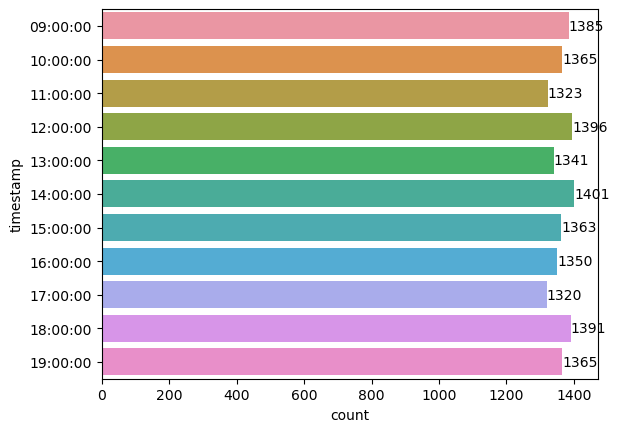

In [45]:
ax=sns.countplot(y=pd.to_datetime(stock_df['timestamp']).dt.time.sort_values())
for i in ax.containers:
  ax.bar_label(i)
plt.show()

In [46]:
stock_df.estimated_stock_pct.describe()

count    15000.000000
mean         0.502735
std          0.286842
min          0.010000
25%          0.260000
50%          0.500000
75%          0.750000
max          1.000000
Name: estimated_stock_pct, dtype: float64

<Axes: xlabel='estimated_stock_pct'>

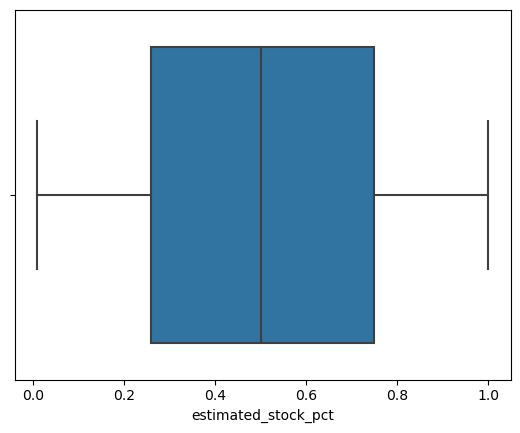

In [47]:
sns.boxplot(x=stock_df.estimated_stock_pct)

* ### Temperature data

In [48]:
temp_df.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:00:00,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:00:00,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:00:00,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:00:00,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:00:00,1.38


In [49]:
pd.to_datetime(temp_df['timestamp']).dt.date.sort_values().unique()

array([datetime.date(2022, 3, 1), datetime.date(2022, 3, 2),
       datetime.date(2022, 3, 3), datetime.date(2022, 3, 4),
       datetime.date(2022, 3, 5), datetime.date(2022, 3, 6),
       datetime.date(2022, 3, 7)], dtype=object)

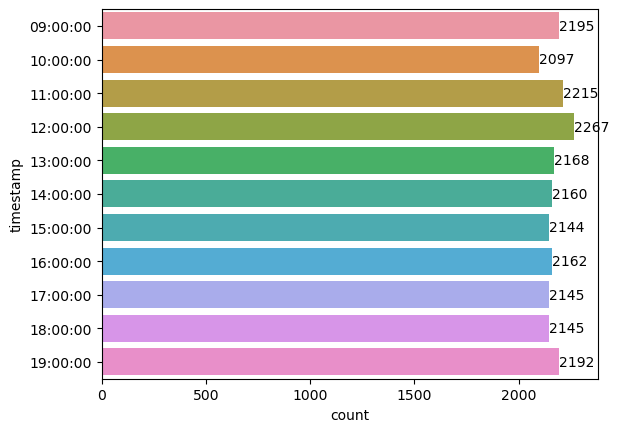

In [50]:
ax=sns.countplot(y=pd.to_datetime(temp_df['timestamp']).dt.time.sort_values())
for i in ax.containers:
  ax.bar_label(i)
plt.show()

In [51]:
temp_df.temperature.describe()

count    23890.000000
mean        -0.207075
std         11.217649
min        -30.990000
25%         -2.860000
50%         -1.000000
75%          1.840000
max         34.990000
Name: temperature, dtype: float64

In [52]:
temp_df.temperature.mode()

0    0.86
Name: temperature, dtype: float64

## Step 4 - Merging the data

In [53]:
sales_df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:00:00,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:00:00,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:00:00,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:00:00,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:00:00,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [54]:
sales_agg=sales_df.groupby(['timestamp','product_id']).agg({'quantity':'sum'}).reset_index()
sales_agg

,timestamp,product_id,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,3
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,3
2,2022-03-01 09:00:00,03a2557a-aa12-4add-a6d4-77dc36342067,3
3,2022-03-01 09:00:00,049b2171-0eeb-4a3e-bf98-0c290c7821da,7
4,2022-03-01 09:00:00,04da844d-8dba-4470-9119-e534d52a03a0,11
...,...,...,...
6212,2022-03-07 19:00:00,edf4ac93-4e14-4a3d-8c60-e715210cf3f9,3
6213,2022-03-07 19:00:00,f01b189c-6345-4639-a8d1-89e1fc67c443,3
6214,2022-03-07 19:00:00,f3bec808-bee0-4597-a129-53a3a2805a43,2
6215,2022-03-07 19:00:00,fd66ac0b-3498-4613-8ec0-764686b0d864,1


In [55]:
stock_df.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:00:00,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:00:00,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:00:00,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:00:00,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:00:00,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [56]:
stock_agg=stock_df.groupby(['timestamp','product_id']).agg({'estimated_stock_pct':'mean'}).reset_index()
stock_agg

,timestamp,product_id,estimated_stock_pct
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05
...,...,...,...
10840,2022-03-07 19:00:00,ecac012c-1dec-41d4-9ebd-56fb7166f6d9,0.50
10841,2022-03-07 19:00:00,ed7f6b14-67c9-42a4-8576-c803020eedda,0.26
10842,2022-03-07 19:00:00,edf4ac93-4e14-4a3d-8c60-e715210cf3f9,0.78
10843,2022-03-07 19:00:00,f01b189c-6345-4639-a8d1-89e1fc67c443,0.92


In [57]:
temp_df.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:00:00,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:00:00,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:00:00,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:00:00,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:00:00,1.38


In [58]:
temp_agg = temp_df.groupby('timestamp').agg({'temperature':'mean'}).reset_index()
temp_agg

,timestamp,temperature
0,2022-03-01 09:00:00,-0.028850
1,2022-03-01 10:00:00,1.284314
2,2022-03-01 11:00:00,-0.560000
3,2022-03-01 12:00:00,-0.537721
4,2022-03-01 13:00:00,-0.188734
...,...,...
72,2022-03-07 15:00:00,-0.943848
73,2022-03-07 16:00:00,-0.230631
74,2022-03-07 17:00:00,-0.003988
75,2022-03-07 18:00:00,0.409693


In [59]:
# merging stock and sales data

merged_df = stock_agg.merge(sales_agg, on=['timestamp','product_id'], how='left')
merged_df

,timestamp,product_id,estimated_stock_pct,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN
...,...,...,...,...
10840,2022-03-07 19:00:00,ecac012c-1dec-41d4-9ebd-56fb7166f6d9,0.50,4.0
10841,2022-03-07 19:00:00,ed7f6b14-67c9-42a4-8576-c803020eedda,0.26,NaN
10842,2022-03-07 19:00:00,edf4ac93-4e14-4a3d-8c60-e715210cf3f9,0.78,3.0
10843,2022-03-07 19:00:00,f01b189c-6345-4639-a8d1-89e1fc67c443,0.92,3.0


In [60]:
# merging the merged_df with temp data

merged_df=merged_df.merge(temp_agg, on='timestamp', how='left')
merged_df

,timestamp,product_id,estimated_stock_pct,quantity,temperature
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.028850
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.028850
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN,-0.028850
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN,-0.028850
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN,-0.028850
...,...,...,...,...,...
10840,2022-03-07 19:00:00,ecac012c-1dec-41d4-9ebd-56fb7166f6d9,0.50,4.0,-0.165077
10841,2022-03-07 19:00:00,ed7f6b14-67c9-42a4-8576-c803020eedda,0.26,NaN,-0.165077
10842,2022-03-07 19:00:00,edf4ac93-4e14-4a3d-8c60-e715210cf3f9,0.78,3.0,-0.165077
10843,2022-03-07 19:00:00,f01b189c-6345-4639-a8d1-89e1fc67c443,0.92,3.0,-0.165077


In [61]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             3067 non-null   float64       
 4   temperature          10845 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 508.4+ KB


In [62]:
merged_df['quantity'] = merged_df['quantity'].fillna(0)
merged_df

,timestamp,product_id,estimated_stock_pct,quantity,temperature
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.028850
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.028850
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.028850
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.028850
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.028850
...,...,...,...,...,...
10840,2022-03-07 19:00:00,ecac012c-1dec-41d4-9ebd-56fb7166f6d9,0.50,4.0,-0.165077
10841,2022-03-07 19:00:00,ed7f6b14-67c9-42a4-8576-c803020eedda,0.26,0.0,-0.165077
10842,2022-03-07 19:00:00,edf4ac93-4e14-4a3d-8c60-e715210cf3f9,0.78,3.0,-0.165077
10843,2022-03-07 19:00:00,f01b189c-6345-4639-a8d1-89e1fc67c443,0.92,3.0,-0.165077


In [63]:
product_category = sales_df[['product_id','category']]
product_category = product_category.drop_duplicates()
merged_df=merged_df.merge(product_category, on='product_id' , how='left')
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,baby products
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,beverages
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,pets


In [64]:
product_price = sales_df[['product_id', 'unit_price']]
product_price = product_price.drop_duplicates()
merged_df=merged_df.merge(product_price, on='product_id' , how='left')
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category,unit_price
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables,1.49
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,baby products,14.19
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,beverages,20.19
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,pets,8.19


## Step 5 - Feature engineering

In [65]:
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category,unit_price
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables,1.49
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,baby products,14.19
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,beverages,20.19
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,pets,8.19


In [66]:
merged_df['timestamp_day_of_month'] = merged_df['timestamp'].dt.day
merged_df['timestamp_day_of_week'] = merged_df['timestamp'].dt.dayofweek
merged_df['timestamp_hour'] = merged_df['timestamp'].dt.hour
merged_df.drop(columns=['timestamp'], inplace=True)
merged_df.head()

,product_id,estimated_stock_pct,quantity,temperature,category,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19,1,1,9
1,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables,1.49,1,1,9
2,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,baby products,14.19,1,1,9
3,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,beverages,20.19,1,1,9
4,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,pets,8.19,1,1,9


In [67]:
merged_df = pd.get_dummies(merged_df, columns=['category'])
merged_df.drop(columns='product_id', inplace=True)
merged_df.head()

,estimated_stock_pct,quantity,temperature,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour,category_baby products,category_baked goods,category_baking,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,0.89,3.0,-0.02885,11.19,1,1,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.14,3.0,-0.02885,1.49,1,1,9,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.67,0.0,-0.02885,14.19,1,1,9,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.82,0.0,-0.02885,20.19,1,1,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.05,0.0,-0.02885,8.19,1,1,9,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [68]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   estimated_stock_pct             10845 non-null  float64
 1   quantity                        10845 non-null  float64
 2   temperature                     10845 non-null  float64
 3   unit_price                      10845 non-null  float64
 4   timestamp_day_of_month          10845 non-null  int64  
 5   timestamp_day_of_week           10845 non-null  int64  
 6   timestamp_hour                  10845 non-null  int64  
 7   category_baby products          10845 non-null  uint8  
 8   category_baked goods            10845 non-null  uint8  
 9   category_baking                 10845 non-null  uint8  
 10  category_beverages              10845 non-null  uint8  
 11  category_canned foods           10845 non-null  uint8  
 12  category_cheese                 

## Step 6 - Modelling

In [69]:
X = merged_df.drop(columns=['estimated_stock_pct'])
y = merged_df['estimated_stock_pct']
print(X.shape)
print(y.shape)

(10845, 28)
(10845,)


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=70, shuffle=True)

In [71]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [72]:
accuracy = []
K=10

for fold in range(0,K):
    model = RandomForestRegressor()

    trained_model = model.fit(X_train, y_train)

    y_pred = trained_model.predict(X_test)

    mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
    
    accuracy.append(mae)
    
    print(f"Fold {fold + 1}: MAE = {mae:.3f}")

print(f"Average MAE: {(sum(accuracy) / len(accuracy)):.2f}")

Fold 1: MAE = 0.236
Fold 2: MAE = 0.236
Fold 3: MAE = 0.236
Fold 4: MAE = 0.236
Fold 5: MAE = 0.237
Fold 6: MAE = 0.235
Fold 7: MAE = 0.237
Fold 8: MAE = 0.236
Fold 9: MAE = 0.237
Fold 10: MAE = 0.236
Average MAE: 0.24


> We can see that the `mean absolute error` (MAE) is almost exactly the same each time. This is a good sign, it shows that the performance of the model is consistent across different random samples of the data, which is what we want. In other words, it shows a robust nature.
>
> Even though the model is predicting robustly, this value for MAE is not so good, since the average value of the target variable is around 0.51, meaning that the accuracy as a percentage was around 50%. In an ideal world, we would want the MAE to be as low as possible.

In [73]:
features = [i.split("__")[0] for i in X.columns]
features

['quantity',
 'temperature',
 'unit_price',
 'timestamp_day_of_month',
 'timestamp_day_of_week',
 'timestamp_hour',
 'category_baby products',
 'category_baked goods',
 'category_baking',
 'category_beverages',
 'category_canned foods',
 'category_cheese',
 'category_cleaning products',
 'category_condiments and sauces',
 'category_dairy',
 'category_frozen',
 'category_fruit',
 'category_kitchen',
 'category_meat',
 'category_medicine',
 'category_packaged foods',
 'category_personal care',
 'category_pets',
 'category_refrigerated items',
 'category_seafood',
 'category_snacks',
 'category_spices and herbs',
 'category_vegetables']

In [74]:
importances = model.feature_importances_
importances

array([0.0768646 , 0.16641562, 0.28038625, 0.05260686, 0.05380517,
       0.10840213, 0.01282034, 0.01569932, 0.01286813, 0.01419478,
       0.01236877, 0.01337143, 0.01420151, 0.01344218, 0.01077102,
       0.01400635, 0.00729365, 0.01089634, 0.01054731, 0.00986758,
       0.01140888, 0.01529887, 0.01090369, 0.01278041, 0.01061768,
       0.0089392 , 0.01082163, 0.00840031])

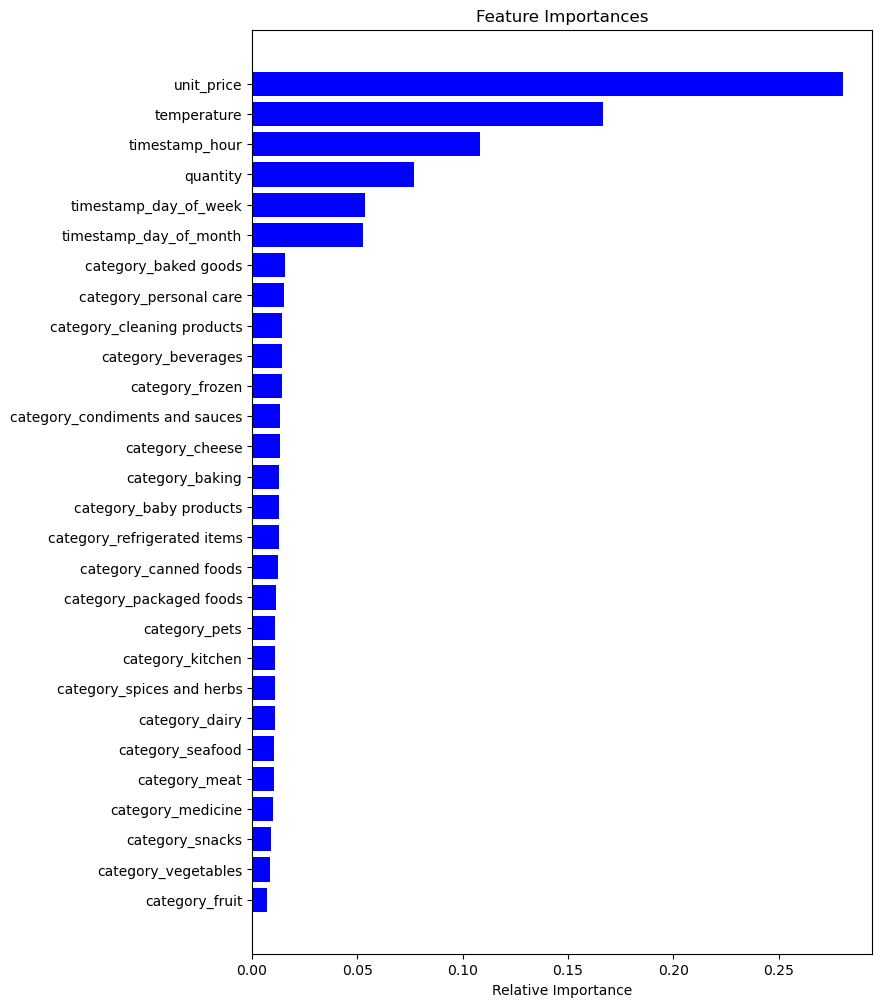

In [75]:
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(8,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [76]:
pd.DataFrame({'Features':features,'Importance Value':importances, '%ct': ((importances*100)/sum(importances))})

,Features,Importance Value,%ct
0,quantity,0.076865,7.686460
1,temperature,0.166416,16.641562
2,unit_price,0.280386,28.038625
3,timestamp_day_of_month,0.052607,5.260686
4,timestamp_day_of_week,0.053805,5.380517
5,timestamp_hour,0.108402,10.840213
6,category_baby products,0.012820,1.282034
7,category_baked goods,0.015699,1.569932
8,category_baking,0.012868,1.286813
9,category_beverages,0.014195,1.419478


In [77]:
pd.DataFrame({'Features':features,'Importance Value':importances, 'Percentage': [round(val) for val in ((importances*100)/sum(importances))]})[:6]

,Features,Importance Value,Percentage
0,quantity,0.076865,8
1,temperature,0.166416,17
2,unit_price,0.280386,28
3,timestamp_day_of_month,0.052607,5
4,timestamp_day_of_week,0.053805,5
5,timestamp_hour,0.108402,11


It is an iterative process in Machine Learning for step 5 and 6 which is feature engineering and modelling. At this stage, since we only have small samples of the data, we can report back to the business with these findings and recommend that the the dataset needs to be further engineered, or more datasets need to be added.